In [27]:
# libs
import gillespy2
import numpy as np
import matplotlib.pyplot as plt


In [28]:
def create_vilar_oscillator(parameter_values=None):
    # Initialize Model
    model = gillespy2.Model(name="VilarOscillator")
    
    # Set System Volume
    model.volume = 1

    # Define Variables (GillesPy2.Species)
    Am = gillespy2.Species(name="Am", initial_value=0, mode="discrete")
    Rm = gillespy2.Species(name="Rm", initial_value=0, mode="discrete")
    A = gillespy2.Species(name="A", initial_value=0, mode="discrete")
    R = gillespy2.Species(name="R", initial_value=0, mode="discrete")
    C = gillespy2.Species(name="C", initial_value=0, mode="discrete")
    # Add Variables to Model
    model.add_species([A, R, C, Am, Rm])

    # Define Parameters
    alphaA = gillespy2.Parameter(name="alphaA", expression=1)
    betaa = gillespy2.Parameter(name="betaa", expression=5)
    betaA = gillespy2.Parameter(name="betaA", expression=50)
    KA = gillespy2.Parameter(name="KA", expression=1)
    betaAa = gillespy2.Parameter(name="betaAa", expression=45)
        
    alphaR = gillespy2.Parameter(name="alphaR", expression=0.2)
    betar = gillespy2.Parameter(name="betar", expression=0.1)
    betaR = gillespy2.Parameter(name="betaR", expression=10)
    KR = gillespy2.Parameter(name="KR", expression=2)
    betaRr = gillespy2.Parameter(name="betaRr", expression=9.9)
    
    n = gillespy2.Parameter(name="n", expression=2)
    k = gillespy2.Parameter(name="k", expression=100)
    # Add Parameters to Model
    model.add_parameter([alphaA, alphaR, betaA, betaa, betaR, betar, betaAa, betaRr, KA, KR, n, k])

    # Define Reactions
    # Bound and unbound of DA/DR
    r1 = gillespy2.Reaction(name="r1", reactants={'A': 1}, products={'A': 1}, rate="betaAa")
    r2 = gillespy2.Reaction(name="r2", reactants={'A': 1}, products={'R': 1}, rate="betaRr")

    # Transcription
    r3 = gillespy2.Reaction(name="r3", reactants={'Am': 1}, products={'A': 1}, rate="betaa")
    r4 = gillespy2.Reaction(name="r4", reactants={'Rm': 1}, products={'R': 1}, rate="betar")

    # Complex formation
    r5 = gillespy2.Reaction(name="r5", reactants={'A': 1, 'R': 1}, products={'C': 1}, rate="k")

    # Degradation
    r6 = gillespy2.Reaction(name="r6", reactants={'A': 1}, products={}, rate="alphaA")
    r7 = gillespy2.Reaction(name="r7", reactants={'R': 1}, products={}, rate="alphaR")
    r8 = gillespy2.Reaction(name="r8", reactants={'C': 1}, products={'R': 1}, rate="alphaA")

    # Add Reactions to Model
    model.add_reaction([r1, r2, r3, r4, r5, r6, r7, r8])

    # Define Timespan
    tspan = gillespy2.TimeSpan.linspace(t=200, num_points=201)
    
    # Set Model Timespan
    model.timespan(tspan)
    return model


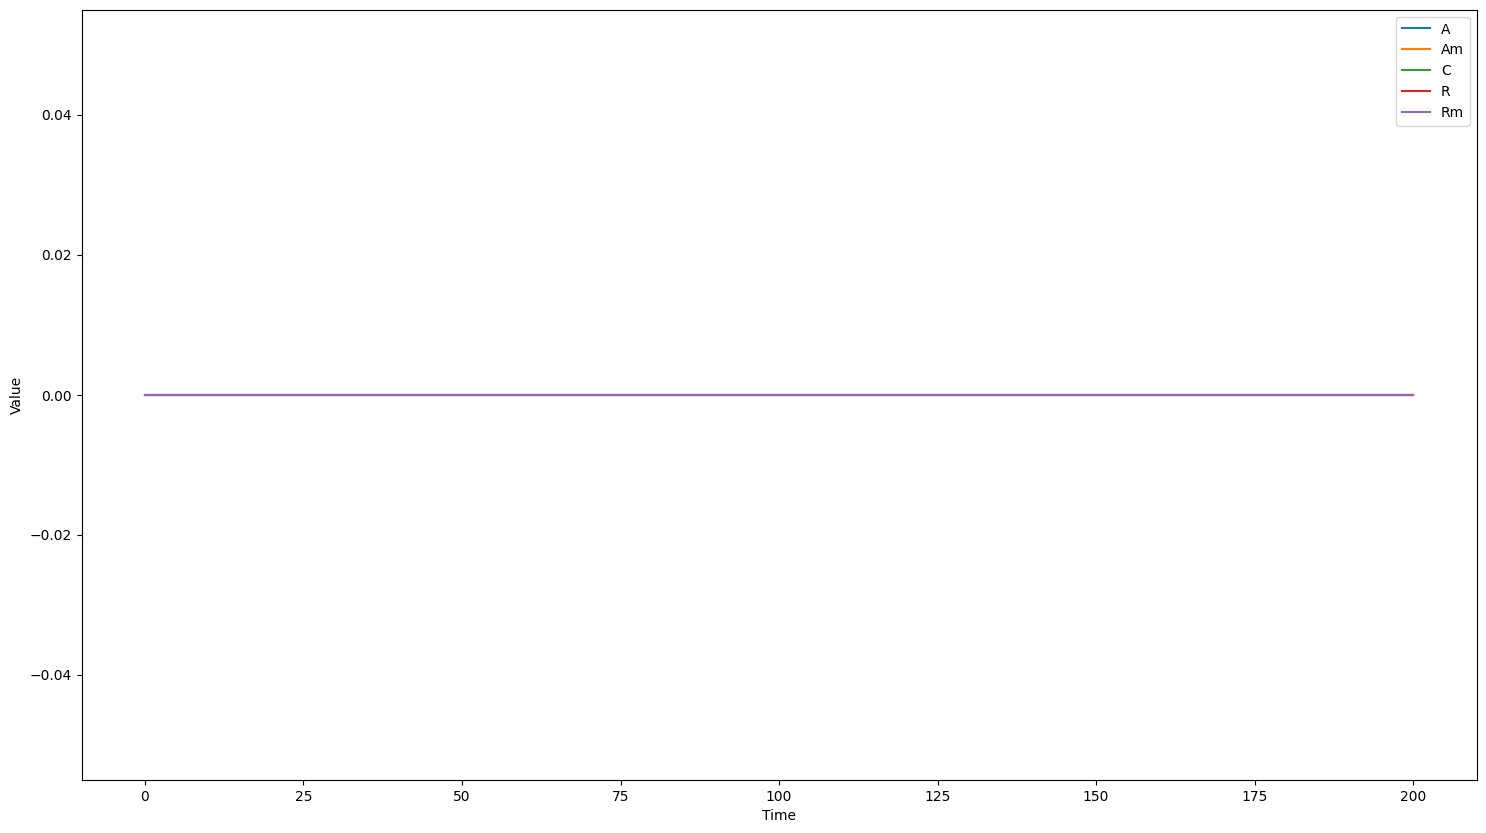

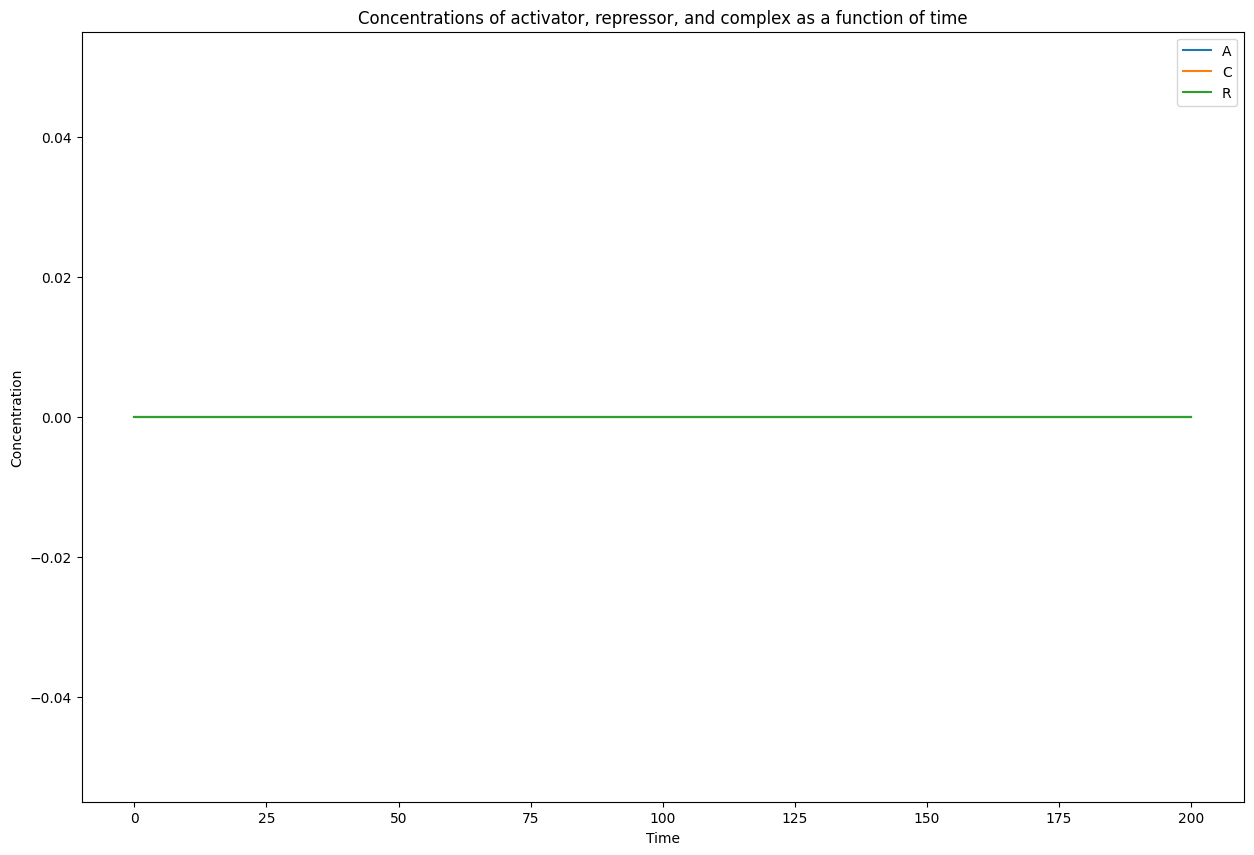

In [29]:
model = create_vilar_oscillator()

ode_results = model.run(algorithm="ODE")
ode_results.plot()

plt.figure(figsize=(15,10))
plt.title("Concentrations of activator, repressor, and complex as a function of time")
plt.xlabel('Time')
plt.ylabel('Concentration')

species_of_interest = ['A', 'C', 'R']

for species in species_of_interest:
    plt.plot(ode_results[0]['time'], ode_results[0][species], label=species)

plt.legend()
plt.show()






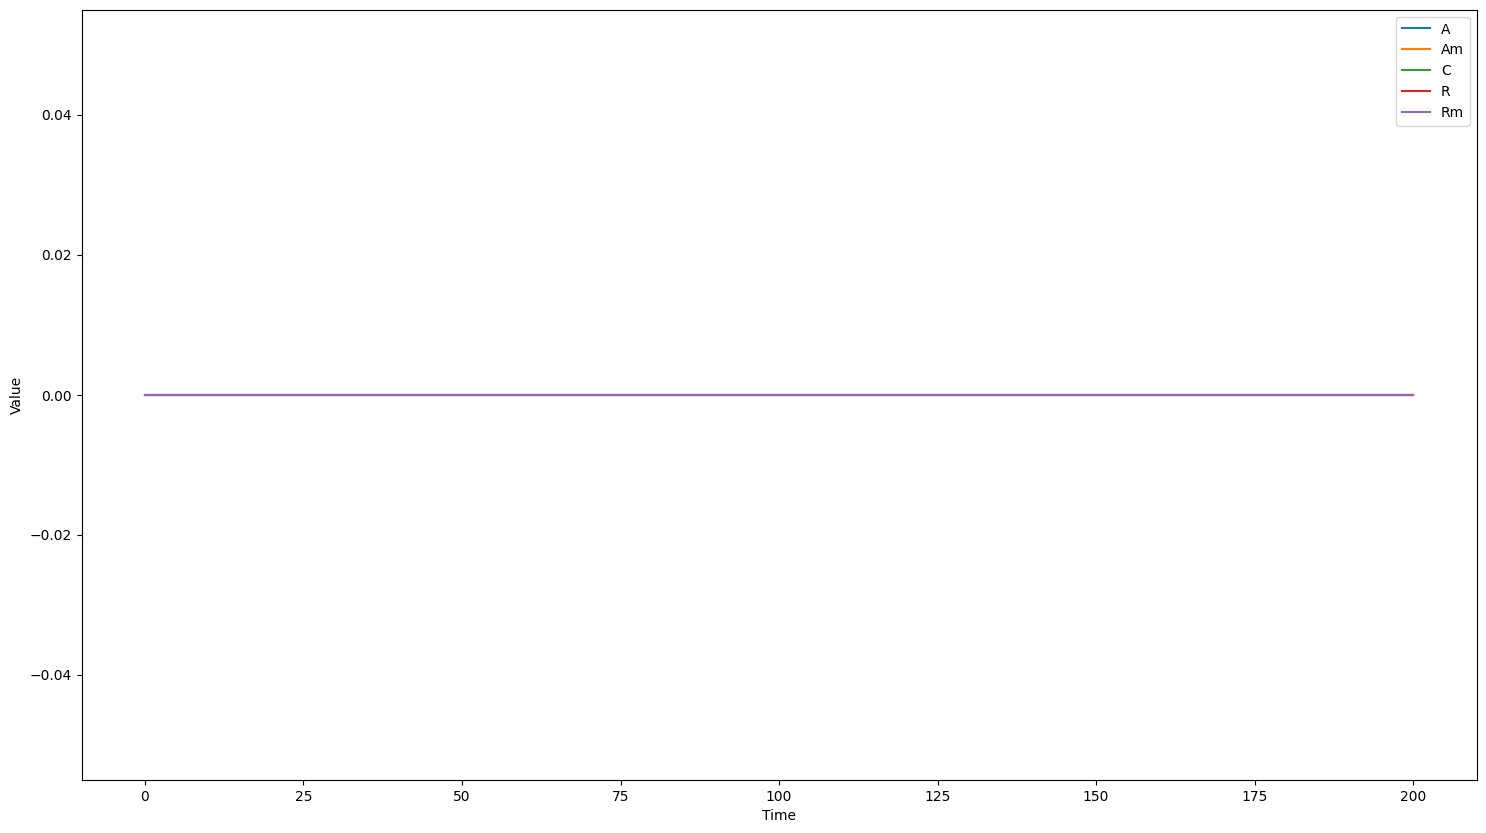

In [30]:
ssa_results = model.run(algorithm="SSA")
ssa_results.plot()